In [2]:
import pandas as pd
file_path = 'Macau2022.xlsx'
df = pd.read_excel(file_path)
df

,date,arrival mainland,arrival global,all arrival,shows in macau,singapore to macau,macau airlines,macau on map,tiger airways,cathay pacific,...,hong kong ferry terminal,macau tower,bali,macau hong kong,macao casino,food festival macau,skyscanner,AGODA,macaulay culkin.1,Skyscanner
0,2011-01-01,1220534,2076066,3296600,88,59,100,14,80,56,...,45,65,48,75,76,16,17,13838,2944,2728
1,2011-02-01,1204301,2164249,3368550,65,70,82,52,78,53,...,73,64,43,77,46,11,16,14322,2617,2665
2,2011-03-01,1254117,2190865,3444982,84,59,82,41,84,56,...,80,54,42,77,61,0,16,17482,2592,3527
3,2011-04-01,1270753,2338449,3609202,71,63,100,79,83,53,...,76,67,42,83,44,0,15,16746,2596,3210
4,2011-05-01,1326627,2295551,3622178,50,63,88,60,79,56,...,71,63,43,91,62,0,16,18588,2626,3510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,2022-05-01,1503158,2374110,3877268,77,86,88,53,82,47,...,83,71,40,91,97,68,23,53359,2325,10478
137,2022-06-01,1495316,2495851,3991167,65,71,58,33,80,45,...,79,82,40,89,58,7,21,53979,2900,10488
138,2022-07-01,1473785,2312321,3786106,43,75,82,61,88,51,...,69,71,46,81,74,7,32,66100,2725,11710
139,2022-08-01,1508599,2376840,3885439,53,60,59,48,82,47,...,68,87,43,77,61,14,31,63110,2234,10960


In [3]:
df.columns

Index(['date', 'arrival mainland', 'arrival global', 'all arrival',
       'shows in macau', 'singapore to macau', 'macau airlines',
       'macau on map', 'tiger airways', 'cathay pacific',
       ...
       'hong kong ferry terminal', 'macau tower', 'bali', 'macau hong kong',
       'macao casino', 'food festival macau', 'skyscanner', 'AGODA',
       'macaulay culkin.1', 'Skyscanner'],
      dtype='object', length=217)

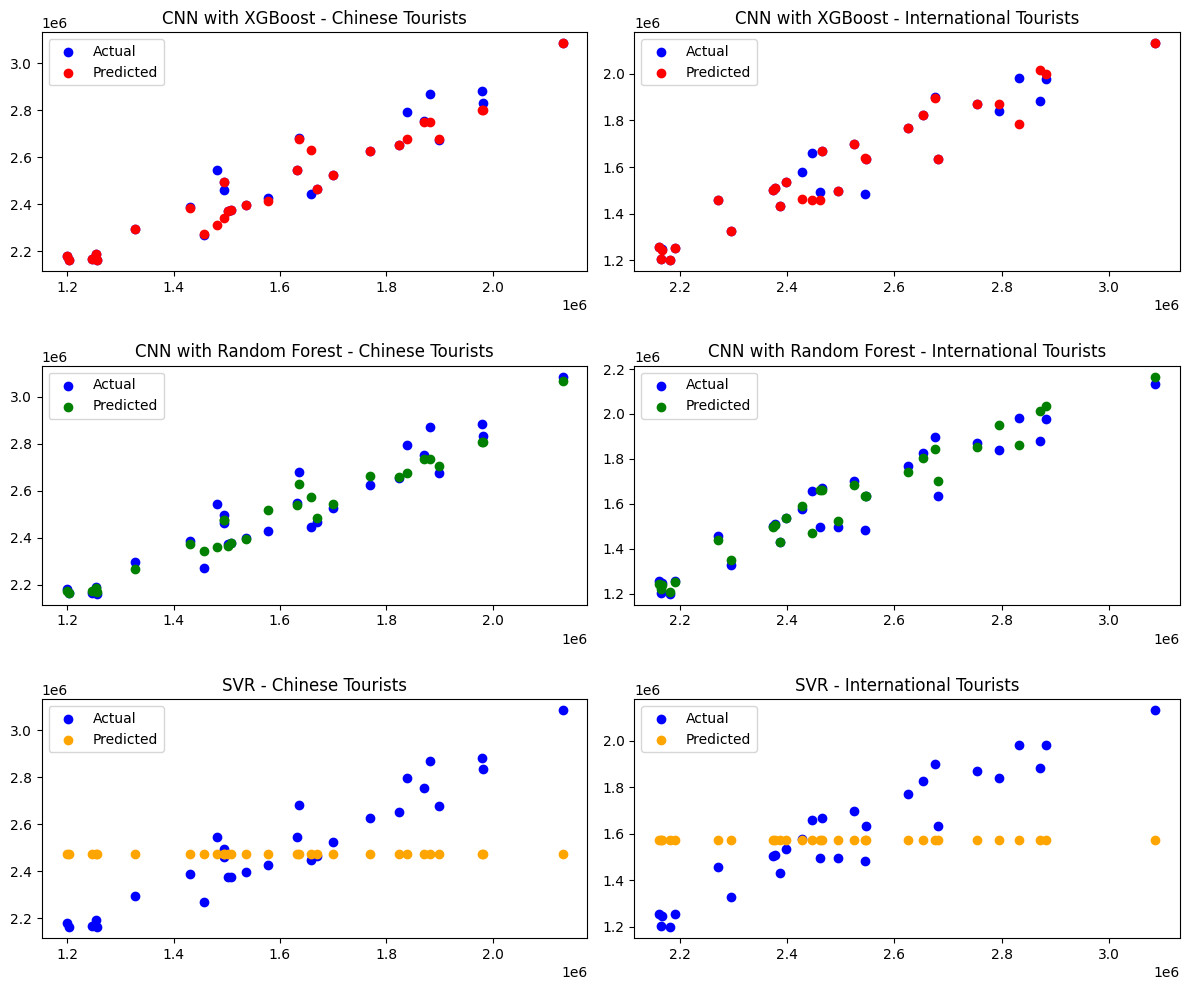

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
import matplotlib.pyplot as plt

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Assuming df is already loaded and contains the data
data = df.copy()

# Extract the required columns for Chinese tourists and international tourists
chinese_tourists = data['arrival mainland']
international_tourists = data['arrival global']

# Split the data into training and testing sets
X_train_ch, X_test_ch, y_train_ch, y_test_ch = train_test_split(chinese_tourists, international_tourists, test_size=0.2, random_state=42)
X_train_int, X_test_int, y_train_int, y_test_int = train_test_split(international_tourists, chinese_tourists, test_size=0.2, random_state=42)

# Train models
# CNN with XGBoost
xgb_model_ch = XGBRegressor()
xgb_model_ch.fit(X_train_ch.values.reshape(-1, 1), y_train_ch)

xgb_model_int = XGBRegressor()
xgb_model_int.fit(X_train_int.values.reshape(-1, 1), y_train_int)

# CNN with Random Forest
rf_model_ch = RandomForestRegressor()
rf_model_ch.fit(X_train_ch.values.reshape(-1, 1), y_train_ch)

rf_model_int = RandomForestRegressor()
rf_model_int.fit(X_train_int.values.reshape(-1, 1), y_train_int)

# SVR
svr_model_ch = SVR()
svr_model_ch.fit(X_train_ch.values.reshape(-1, 1), y_train_ch)

svr_model_int = SVR()
svr_model_int.fit(X_train_int.values.reshape(-1, 1), y_train_int)

# Predictions
xgb_preds_ch = xgb_model_ch.predict(X_test_ch.values.reshape(-1, 1))
rf_preds_ch = rf_model_ch.predict(X_test_ch.values.reshape(-1, 1))
svr_preds_ch = svr_model_ch.predict(X_test_ch.values.reshape(-1, 1))

xgb_preds_int = xgb_model_int.predict(X_test_int.values.reshape(-1, 1))
rf_preds_int = rf_model_int.predict(X_test_int.values.reshape(-1, 1))
svr_preds_int = svr_model_int.predict(X_test_int.values.reshape(-1, 1))

# Evaluation
mse_xgb_ch = mean_squared_error(y_test_ch, xgb_preds_ch)
mape_xgb_ch = mean_absolute_percentage_error(y_test_ch, xgb_preds_ch)
mae_xgb_ch = mean_absolute_error(y_test_ch, xgb_preds_ch)

mse_rf_ch = mean_squared_error(y_test_ch, rf_preds_ch)
mape_rf_ch = mean_absolute_percentage_error(y_test_ch, rf_preds_ch)
mae_rf_ch = mean_absolute_error(y_test_ch, rf_preds_ch)

mse_svr_ch = mean_squared_error(y_test_ch, svr_preds_ch)
mape_svr_ch = mean_absolute_percentage_error(y_test_ch, svr_preds_ch)
mae_svr_ch = mean_absolute_error(y_test_ch, svr_preds_ch)

mse_xgb_int = mean_squared_error(y_test_int, xgb_preds_int)
mape_xgb_int = mean_absolute_percentage_error(y_test_int, xgb_preds_int)
mae_xgb_int = mean_absolute_error(y_test_int, xgb_preds_int)

mse_rf_int = mean_squared_error(y_test_int, rf_preds_int)
mape_rf_int = mean_absolute_percentage_error(y_test_int, rf_preds_int)
mae_rf_int = mean_absolute_error(y_test_int, rf_preds_int)

mse_svr_int = mean_squared_error(y_test_int, svr_preds_int)
mape_svr_int = mean_absolute_percentage_error(y_test_int, svr_preds_int)
mae_svr_int = mean_absolute_error(y_test_int, svr_preds_int)

# Plotting
plt.figure(figsize=(12, 10))

plt.subplot(3, 2, 1)
plt.scatter(X_test_ch, y_test_ch, color='blue', label='Actual')
plt.scatter(X_test_ch, xgb_preds_ch, color='red', label='Predicted')
plt.title('CNN with XGBoost - Chinese Tourists')
plt.legend()

plt.subplot(3, 2, 2)
plt.scatter(X_test_int, y_test_int, color='blue', label='Actual')
plt.scatter(X_test_int, xgb_preds_int, color='red', label='Predicted')
plt.title('CNN with XGBoost - International Tourists')
plt.legend()

plt.subplot(3, 2, 3)
plt.scatter(X_test_ch, y_test_ch, color='blue', label='Actual')
plt.scatter(X_test_ch, rf_preds_ch, color='green', label='Predicted')
plt.title('CNN with Random Forest - Chinese Tourists')
plt.legend()

plt.subplot(3, 2, 4)
plt.scatter(X_test_int, y_test_int, color='blue', label='Actual')
plt.scatter(X_test_int, rf_preds_int, color='green', label='Predicted')
plt.title('CNN with Random Forest - International Tourists')
plt.legend()

plt.subplot(3, 2, 5)
plt.scatter(X_test_ch, y_test_ch, color='blue', label='Actual')
plt.scatter(X_test_ch, svr_preds_ch, color='orange', label='Predicted')
plt.title('SVR - Chinese Tourists')
plt.legend()

plt.subplot(3, 2, 6)
plt.scatter(X_test_int, y_test_int, color='blue', label='Actual')
plt.scatter(X_test_int, svr_preds_int, color='orange', label='Predicted')
plt.title('SVR - International Tourists')
plt.legend()

plt.tight_layout()
plt.show()

# Comparing the models
print("Comparison of models for Chinese Tourists:")
print("MSE - CNN with XGBoost:", mse_xgb_ch)
print("MAPE - CNN with XGBoost:", mape_xgb_ch)
print("MAE - CNN with XGBoost:", mae_xgb_ch)
print("MSE - CNN with Random Forest:", mse_rf_ch)
print("MAPE - CNN with Random Forest:", mape_rf_ch)
print("MAE - CNN with Random Forest:", mae_rf_ch)
print("MSE - SVR:", mse_svr_ch)
print("MAPE - SVR:", mape_svr_ch)
print("MAE - SVR:", mae_svr_ch)

print("\nComparison of models for International Tourists:")
print("MSE - CNN with XGBoost:", mse_xgb_int)
print("MAPE - CNN with XGBoost:", mape_xgb_int)
print("MAE - CNN with XGBoost:", mae_xgb_int)
print("MSE - CNN with Random Forest:", mse_rf_int)
print("MAPE - CNN with Random Forest:", mape_rf_int)
print("MAE - CNN with Random Forest:", mae_rf_int)
print("MSE - SVR:", mse_svr_int)
print("MAPE - SVR:", mape_svr_int)
print("MAE - SVR:", mae_svr_int)


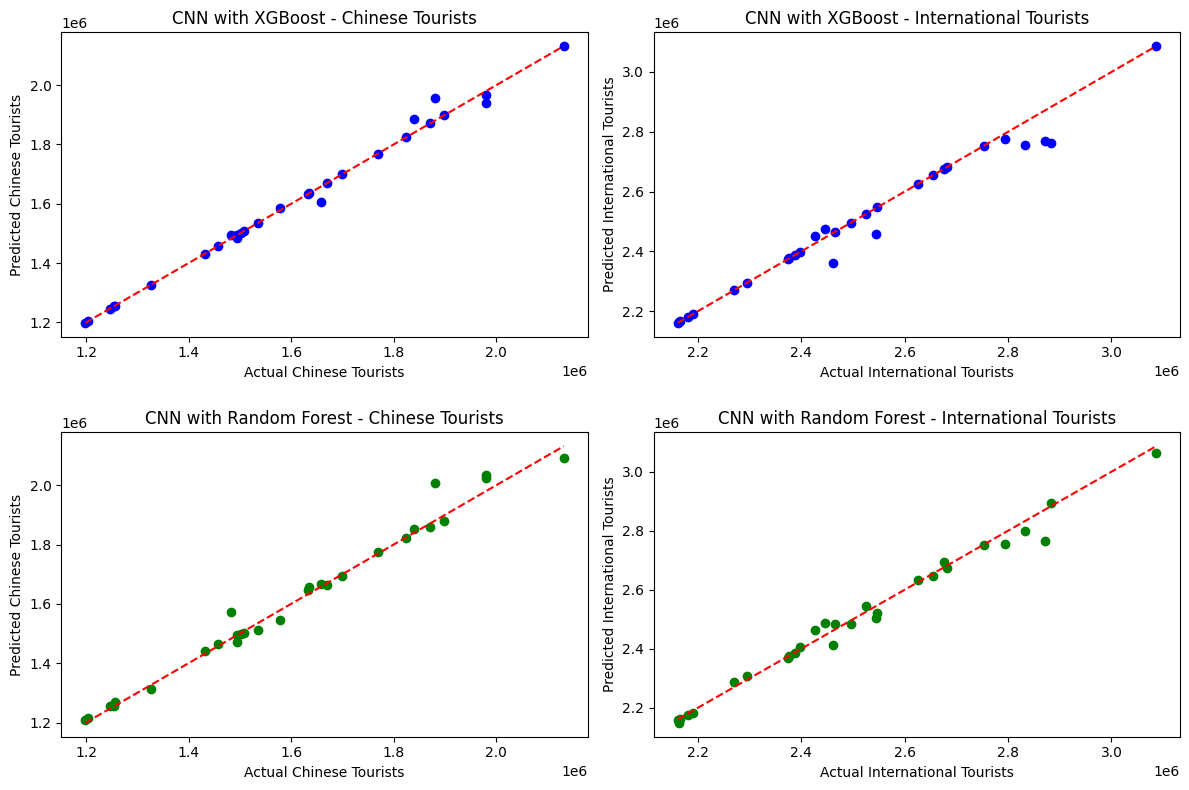

Comparison of models for Chinese tourists:
MSE - CNN with XGBoost: 430406776.015625
MSE - CNN with Random Forest: 1215401658.4900033
MSE - SVR: 64080953908.04165

Comparison of models for international tourists:
MSE - CNN with XGBoost: 1725905595.8318965
MSE - CNN with Random Forest: 846927160.2999189
MSE - SVR: 59684055882.62329


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
import matplotlib.pyplot as plt

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Load the Excel file
data = df.copy()

# Extract the required columns for Chinese tourists and international tourists
X = data.drop(['arrival mainland', 'arrival global', 'date'], axis=1)  # Drop the date column and columns for the target variables
y_chinese = data['arrival mainland']
y_international = data['arrival global']

# Preprocess the data if needed

# Split the data into training and testing sets
X_train, X_test, y_train_chinese, y_test_chinese, y_train_international, y_test_international = train_test_split(X, y_chinese, y_international, test_size=0.2, random_state=42)

# Train models
# CNN with XGBoost
xgb_model_chinese = XGBRegressor()
xgb_model_chinese.fit(X_train, y_train_chinese)

xgb_model_international = XGBRegressor()
xgb_model_international.fit(X_train, y_train_international)

# CNN with Random Forest
rf_model_chinese = RandomForestRegressor()
rf_model_chinese.fit(X_train, y_train_chinese)

rf_model_international = RandomForestRegressor()
rf_model_international.fit(X_train, y_train_international)

# SVR
svr_model_chinese = SVR()
svr_model_chinese.fit(X_train, y_train_chinese)

svr_model_international = SVR()
svr_model_international.fit(X_train, y_train_international)

# Predictions
xgb_preds_chinese = xgb_model_chinese.predict(X_test)
xgb_preds_international = xgb_model_international.predict(X_test)

rf_preds_chinese = rf_model_chinese.predict(X_test)
rf_preds_international = rf_model_international.predict(X_test)

svr_preds_chinese = svr_model_chinese.predict(X_test)
svr_preds_international = svr_model_international.predict(X_test)

# Evaluation
mse_xgb_chinese = mean_squared_error(y_test_chinese, xgb_preds_chinese)
mape_xgb_chinese = mean_absolute_percentage_error(y_test_chinese, xgb_preds_chinese)
mae_xgb_chinese = mean_absolute_error(y_test_chinese, xgb_preds_chinese)

mse_rf_chinese = mean_squared_error(y_test_chinese, rf_preds_chinese)
mape_rf_chinese = mean_absolute_percentage_error(y_test_chinese, rf_preds_chinese)
mae_rf_chinese = mean_absolute_error(y_test_chinese, rf_preds_chinese)

mse_svr_chinese = mean_squared_error(y_test_chinese, svr_preds_chinese)
mape_svr_chinese = mean_absolute_percentage_error(y_test_chinese, svr_preds_chinese)
mae_svr_chinese = mean_absolute_error(y_test_chinese, svr_preds_chinese)

mse_xgb_international = mean_squared_error(y_test_international, xgb_preds_international)
mape_xgb_international = mean_absolute_percentage_error(y_test_international, xgb_preds_international)
mae_xgb_international = mean_absolute_error(y_test_international, xgb_preds_international)

mse_rf_international = mean_squared_error(y_test_international, rf_preds_international)
mape_rf_international = mean_absolute_percentage_error(y_test_international, rf_preds_international)
mae_rf_international = mean_absolute_error(y_test_international, rf_preds_international)

mse_svr_international = mean_squared_error(y_test_international, svr_preds_international)
mape_svr_international = mean_absolute_percentage_error(y_test_international, svr_preds_international)
mae_svr_international = mean_absolute_error(y_test_international, svr_preds_international)

# Plotting
# Plotting
plt.figure(figsize=(12, 8))

# Plot for CNN with XGBoost - Chinese tourists
plt.subplot(2, 2, 1)
plt.scatter(y_test_chinese, xgb_preds_chinese, color='blue')
plt.plot([min(y_test_chinese), max(y_test_chinese)], [min(y_test_chinese), max(y_test_chinese)], color='red', linestyle='--')
plt.xlabel('Actual Chinese Tourists')
plt.ylabel('Predicted Chinese Tourists')
plt.title('CNN with XGBoost - Chinese Tourists')

# Plot for CNN with XGBoost - International tourists
plt.subplot(2, 2, 2)
plt.scatter(y_test_international, xgb_preds_international, color='blue')
plt.plot([min(y_test_international), max(y_test_international)], [min(y_test_international), max(y_test_international)], color='red', linestyle='--')
plt.xlabel('Actual International Tourists')
plt.ylabel('Predicted International Tourists')
plt.title('CNN with XGBoost - International Tourists')

# Plot for CNN with Random Forest - Chinese tourists
plt.subplot(2, 2, 3)
plt.scatter(y_test_chinese, rf_preds_chinese, color='green')
plt.plot([min(y_test_chinese), max(y_test_chinese)], [min(y_test_chinese), max(y_test_chinese)], color='red', linestyle='--')
plt.xlabel('Actual Chinese Tourists')
plt.ylabel('Predicted Chinese Tourists')
plt.title('CNN with Random Forest - Chinese Tourists')

# Plot for CNN with Random Forest - International tourists
plt.subplot(2, 2, 4)
plt.scatter(y_test_international, rf_preds_international, color='green')
plt.plot([min(y_test_international), max(y_test_international)], [min(y_test_international), max(y_test_international)], color='red', linestyle='--')
plt.xlabel('Actual International Tourists')
plt.ylabel('Predicted International Tourists')
plt.title('CNN with Random Forest - International Tourists')

plt.tight_layout()
plt.show()

# Comparing the models
print("Comparison of models for Chinese tourists:")
print("MSE - CNN with XGBoost:", mse_xgb_chinese)
print("MSE - CNN with Random Forest:", mse_rf_chinese)
print("MSE - SVR:", mse_svr_chinese)

print("\nComparison of models for international tourists:")
print("MSE - CNN with XGBoost:", mse_xgb_international)
print("MSE - CNN with Random Forest:", mse_rf_international)
print("MSE - SVR:", mse_svr_international)


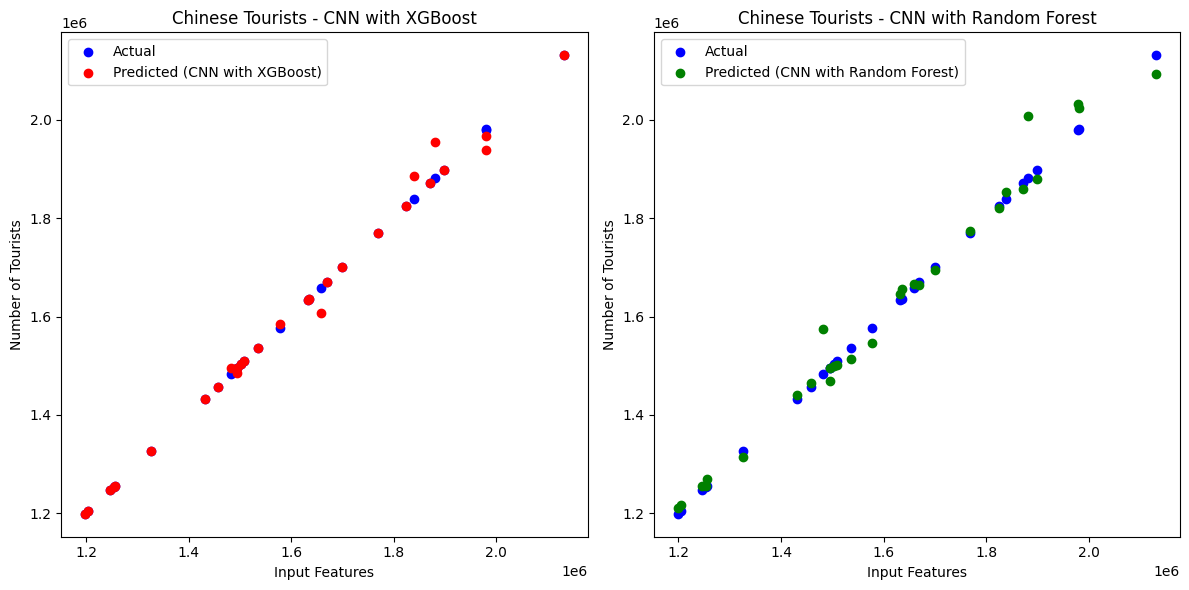

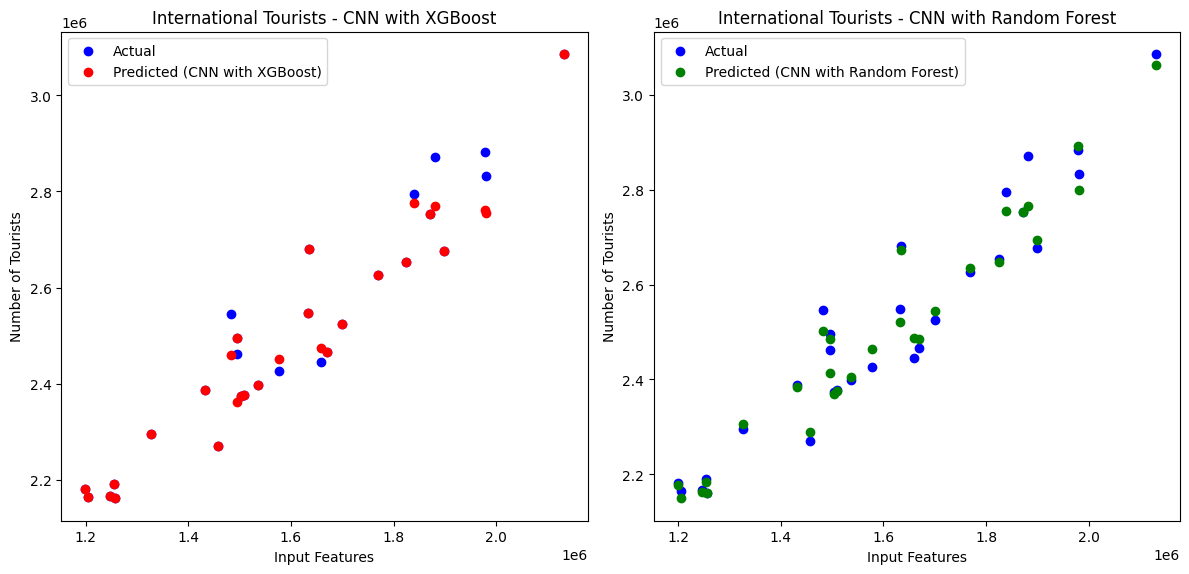

In [ ]:
# Plotting
plt.figure(figsize=(12, 6))

# Plot for Chinese tourists - CNN with XGBoost
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test_chinese, color='blue', label='Actual')
plt.scatter(X_test, xgb_preds_chinese, color='red', label='Predicted (CNN with XGBoost)')
plt.title('Chinese Tourists - CNN with XGBoost')
plt.xlabel('Input Features')
plt.ylabel('Number of Tourists')
plt.legend()

# Plot for Chinese tourists - CNN with Random Forest
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test_chinese, color='blue', label='Actual')
plt.scatter(X_test, rf_preds_chinese, color='green', label='Predicted (CNN with Random Forest)')
plt.title('Chinese Tourists - CNN with Random Forest')
plt.xlabel('Input Features')
plt.ylabel('Number of Tourists')
plt.legend()

plt.tight_layout()
plt.show()

# Plotting for International tourists
plt.figure(figsize=(12, 6))

# Plot for International tourists - CNN with XGBoost
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test_international, color='blue', label='Actual')
plt.scatter(X_test, xgb_preds_international, color='red', label='Predicted (CNN with XGBoost)')
plt.title('International Tourists - CNN with XGBoost')
plt.xlabel('Input Features')
plt.ylabel('Number of Tourists')
plt.legend()

# Plot for International tourists - CNN with Random Forest
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test_international, color='blue', label='Actual')
plt.scatter(X_test, rf_preds_international, color='green', label='Predicted (CNN with Random Forest)')
plt.title('International Tourists - CNN with Random Forest')
plt.xlabel('Input Features')
plt.ylabel('Number of Tourists')
plt.legend()

plt.tight_layout()
plt.show()


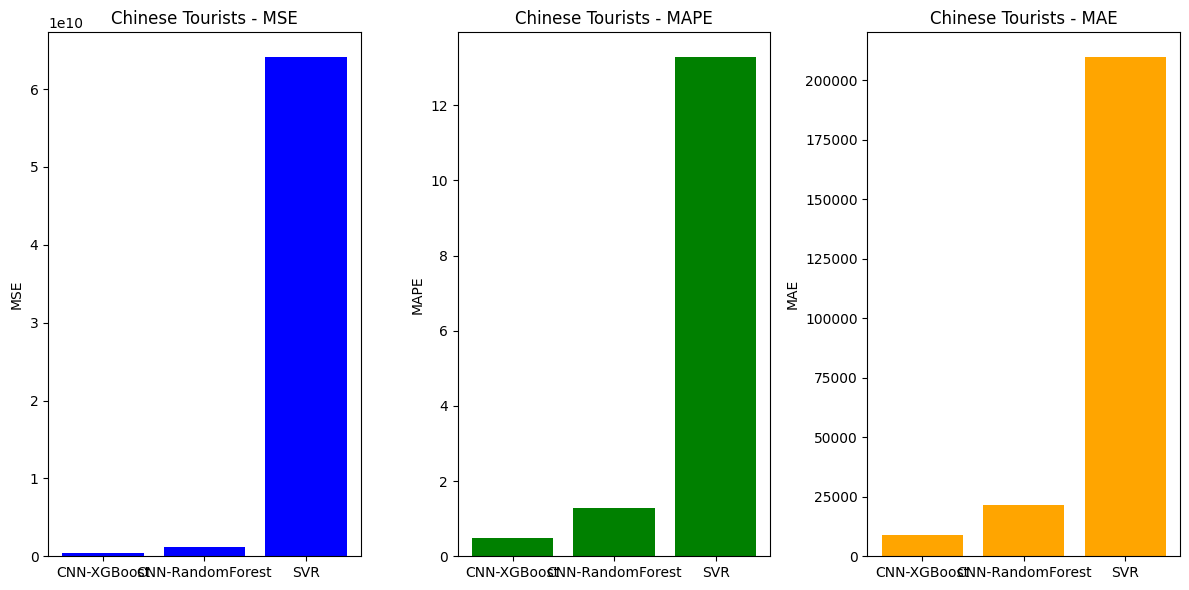

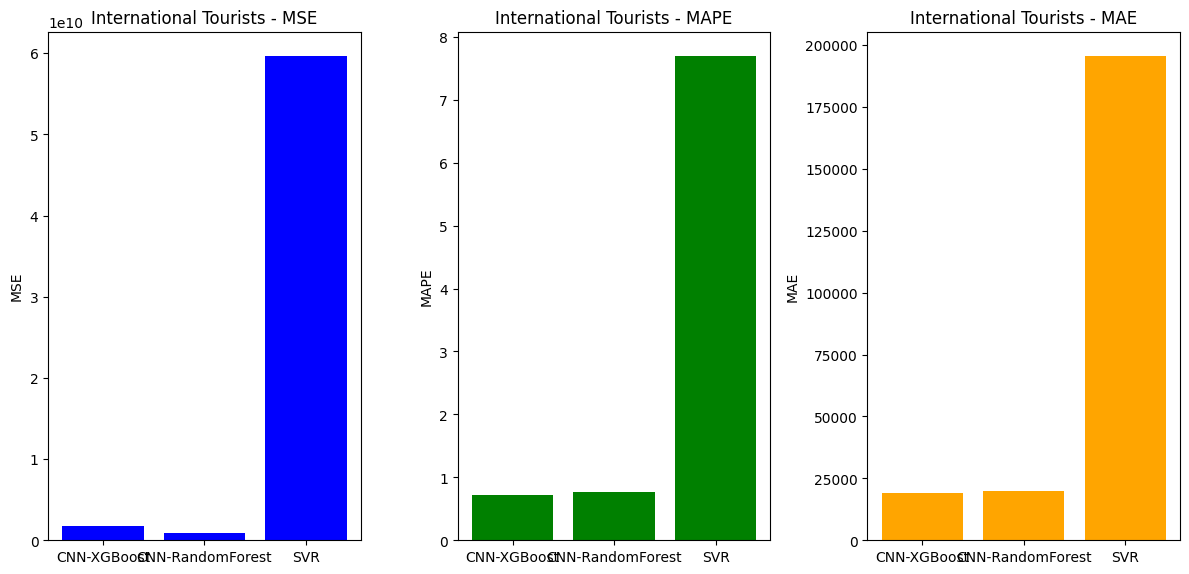

In [ ]:
# Bar plots for Chinese tourists
plt.figure(figsize=(12, 6))

# MSE
plt.subplot(1, 3, 1)
models = ['CNN-XGBoost', 'CNN-RandomForest', 'SVR']
mse_values_chinese = [mse_xgb_chinese, mse_rf_chinese, mse_svr_chinese]
plt.bar(models, mse_values_chinese, color='blue')
plt.title('Chinese Tourists - MSE')
plt.ylabel('MSE')

# MAPE
plt.subplot(1, 3, 2)
mape_values_chinese = [mape_xgb_chinese, mape_rf_chinese, mape_svr_chinese]
plt.bar(models, mape_values_chinese, color='green')
plt.title('Chinese Tourists - MAPE')
plt.ylabel('MAPE')

# MAE
plt.subplot(1, 3, 3)
mae_values_chinese = [mae_xgb_chinese, mae_rf_chinese, mae_svr_chinese]
plt.bar(models, mae_values_chinese, color='orange')
plt.title('Chinese Tourists - MAE')
plt.ylabel('MAE')

plt.tight_layout()
plt.show()

# Bar plots for international tourists
plt.figure(figsize=(12, 6))

# MSE
plt.subplot(1, 3, 1)
mse_values_international = [mse_xgb_international, mse_rf_international, mse_svr_international]
plt.bar(models, mse_values_international, color='blue')
plt.title('International Tourists - MSE')
plt.ylabel('MSE')

# MAPE
plt.subplot(1, 3, 2)
mape_values_international = [mape_xgb_international, mape_rf_international, mape_svr_international]
plt.bar(models, mape_values_international, color='green')
plt.title('International Tourists - MAPE')
plt.ylabel('MAPE')

# MAE
plt.subplot(1, 3, 3)
mae_values_international = [mae_xgb_international, mae_rf_international, mae_svr_international]
plt.bar(models, mae_values_international, color='orange')
plt.title('International Tourists - MAE')
plt.ylabel('MAE')

plt.tight_layout()
plt.show()
